In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir("/Users/Hatim/Downloads/")

In [3]:
df = pd.read_csv("home_prices_train.csv",index_col = 0)

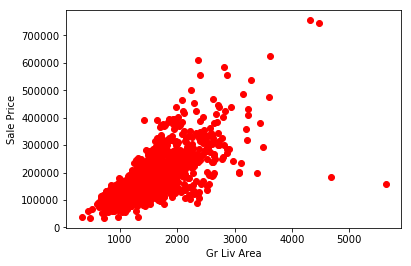

In [4]:
plt.plot(df['GrLivArea'],df['SalePrice'],'ro')
plt.xlabel("Gr Liv Area")
plt.ylabel("Sale Price")
plt.show()

In [5]:
#As it can be seen that there are few outliers. Removing those outliers to get better results.
df = df[df["GrLivArea"]<4000]

In [6]:
print(df.isnull().sum(axis=0).to_string())

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1365
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

As it can be seen that there are many NaN values. This doesn't mean that the data is missing.
These NaN values have some meaning to it. For example, when there is no Garage present which
is inferred by looking at the Garage Count (Count = 0), we will not have any data
on the quality of the Garage and hence it is NaN. So here we can replace NaN with "Garage Not Present" or 
something on similar lines.

In [7]:
def missing_data_treatment(dataframe):
    "It is likely that no street is connected to the property and hence the LotFrontage is zero"
    dataframe.loc[:,"LotFrontage"] = dataframe.loc[:,"LotFrontage"].fillna(0)
    "There is no alley access when Alley = NaN"
    dataframe.loc[:,"Alley"] = dataframe.loc[:,"Alley"].fillna("NoAlleyAccess")
    "No Basement when NaN values present in BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2"
    dataframe.loc[:,"BsmtQual"] = dataframe.loc[:,"BsmtQual"].fillna("No")
    dataframe.loc[:,"BsmtCond"] = dataframe.loc[:,"BsmtCond"].fillna("No")
    dataframe.loc[:,"BsmtExposure"] = dataframe.loc[:,"BsmtExposure"].fillna("No")
    dataframe.loc[:,"BsmtFinType1"] = dataframe.loc[:,"BsmtFinType1"].fillna("No")
    dataframe.loc[:,"BsmtFinType2"] = dataframe.loc[:,"BsmtFinType2"].fillna("No")
    "NaN in Electrical means No Electrial System"
    dataframe.loc[:,"Electrical"] = dataframe.loc[:,"Electrical"].fillna("NoElectricalSystem")
    "NaN in FireplaceQu means no Fireplace present"
    dataframe.loc[:,"FireplaceQu"] = dataframe.loc[:,"FireplaceQu"].fillna("NoFireplacePresent")
    "No Garage present wherever there is NaN in garage related fields as discussed in the above cell"
    dataframe.loc[:,"GarageType"] = dataframe.loc[:,"GarageType"].fillna("NoGarage")
    dataframe.loc[:,"GarageYrBlt"] = dataframe.loc[:,"GarageYrBlt"].fillna("NoGarage")
    dataframe.loc[:,"GarageFinish"] = dataframe.loc[:,"GarageFinish"].fillna("NoGarage")
    dataframe.loc[:,"GarageQual"] = dataframe.loc[:,"GarageQual"].fillna("NoGarage")
    dataframe.loc[:,"GarageCond"] = dataframe.loc[:,"GarageCond"].fillna("NoGarage")
    "Similarly for other variables"
    dataframe.loc[:,"PoolQC"] = dataframe.loc[:,"PoolQC"].fillna("NoPool")
    dataframe.loc[:,"Fence"] = dataframe.loc[:,"Fence"].fillna("NoFence")
    dataframe.loc[:,"MiscFeature"] = dataframe.loc[:,"MiscFeature"].fillna("NoMisc")
    """MasVnrType and MasVnrArea also has NaN values. We cannot comment anything on those NaN values because it 
    already has the field None. We cannot assume those NaN values to be None. The other option would be to drop those 
    NaN values. But since out of those 8 values one of them has a sales price of 465000, it wouldn't be wise to 
    drop those 8 values. Only option left is to assume it to be None and 0."""
    dataframe.loc[:,"MasVnrType"] = dataframe.loc[:,"MasVnrType"].fillna("None")
    dataframe.loc[:,"MasVnrArea"] = dataframe.loc[:,"MasVnrArea"].fillna(0)

In [8]:
missing_data_treatment(df)

In [9]:
print(df.isnull().sum(axis=0).to_string())

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [10]:
##taking care of categorical variables. Giving them numbers.
df['SaleCondition'] = df['SaleCondition'].astype('category')
df['SaleCondition'] = df['SaleCondition'].cat.reorder_categories(['Abnorml', 'Partial', "AdjLand",'Alloca',"Normal","Family"], ordered=True)
df['SaleCondition'] = df['SaleCondition'].cat.codes
df['Functional'] = df['Functional'].astype('category')
df['Functional'] = df['Functional'].cat.reorder_categories(['Typ','Min1','Min2','Mod','Maj1','Maj2','Sev'])
df["Functional"] = df['Functional'].cat.codes
df['ExterQual'] = df['ExterQual'].astype('category')
df['ExterQual'] = df['ExterQual'].cat.reorder_categories(['Ex','Gd','TA','Fa'])
df["ExterQual"] = df['ExterQual'].cat.codes
df['ExterCond'] = df['ExterCond'].astype('category')
df['ExterCond'] = df['ExterCond'].cat.reorder_categories(['Ex','Gd','TA','Fa','Po'])
df["ExterCond"] = df['ExterCond'].cat.codes

In [83]:
#selecting the same variables as linear regression
X=df[["GrLivArea","OverallQual","YearBuilt","Functional","LotArea","ExterQual","1stFlrSF","2ndFlrSF"]]
y=df["SalePrice"]

In [84]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_curve, auc,log_loss,precision_score,r2_score
from sklearn.feature_selection import RFECV
from sklearn.model_selection import ShuffleSplit, StratifiedKFold
from sklearn.svm import SVC,SVR,LinearSVR
import warnings
from sklearn.ensemble import BaggingClassifier as BC
warnings.filterwarnings("ignore", category=DeprecationWarning)
scaler = StandardScaler()


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [72]:
def gridsearch(X_train,y_train,X_test,y_test,model, params, scoring,cv=None):
    gs_cv = GridSearchCV(model,params,scoring=scoring,n_jobs=-1,cv=cv)
    gs_cv.fit(X_train, y_train)
    y_pred_train = gs_cv.predict(X_train)
    y_pred_test = gs_cv.predict(X_test)
    print("----------------------------TRAINING DATA----------------------------")
    print("R-squared on training set is: "+str(r2_score(y_train,y_pred_train)))
    print("----------------------------TEST DATA----------------------------")     
    print("R-squared on test set is: "+str(r2_score(y_test,y_pred_test)))
    print("-----------------------------------------------------------------")
    print("BEST PARAMETERS BASED ON "+scoring+" AS A SCORING PARAMETER")  
    print("Best parameters: "+str(gs_cv.best_params_))

In [73]:
svr_parameters = {'C': [0.001, 0.01, 0.1, 1, 10],
                  'epsilon':[0.1,0.5,1,10,50,100]}

In [74]:
svr = LinearSVR(loss="squared_epsilon_insensitive",dual=False)

In [76]:
gridsearch(X_train,y_train,X_test,y_test,svr,svr_parameters,"r2",5)

----------------------------TRAINING DATA----------------------------
R-squared on training set is: 0.62076820951
----------------------------TEST DATA----------------------------
R-squared on test set is: 0.566171473954
-----------------------------------------------------------------
BEST PARAMETERS BASED ON r2 AS A SCORING PARAMETER
Best parameters: {'C': 0.001, 'epsilon': 100}


In [77]:
#trying different features
X=df[['YearBuilt','YrSold','SaleCondition','MoSold','LotArea','BedroomAbvGr','OverallCond','OverallQual']]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)
gridsearch(X_train,y_train,X_test,y_test,svr,svr_parameters,"r2",5)

----------------------------TRAINING DATA----------------------------
R-squared on training set is: 0.376299706431
----------------------------TEST DATA----------------------------
R-squared on test set is: 0.384823559917
-----------------------------------------------------------------
BEST PARAMETERS BASED ON r2 AS A SCORING PARAMETER
Best parameters: {'C': 0.001, 'epsilon': 100}


In [89]:
#taking all numerical values
X_train, X_test, y_train, y_test = train_test_split(df.select_dtypes(include=['float64','int64']), y,test_size=0.2,random_state=42)

In [90]:
gridsearch(X_train,y_train,X_test,y_test,svr,svr_parameters,"r2",5)

----------------------------TRAINING DATA----------------------------
R-squared on training set is: 0.999999821004
----------------------------TEST DATA----------------------------
R-squared on test set is: 0.999999837541
-----------------------------------------------------------------
BEST PARAMETERS BASED ON r2 AS A SCORING PARAMETER
Best parameters: {'C': 1, 'epsilon': 50}


In [91]:
#taking all numerical values
X_train, X_test, y_train, y_test = train_test_split(df.select_dtypes(include=['float64','int64']), y,test_size=0.3,random_state=42)

In [92]:
gridsearch(X_train,y_train,X_test,y_test,svr,svr_parameters,"r2",5)

----------------------------TRAINING DATA----------------------------
R-squared on training set is: 0.999999902578
----------------------------TEST DATA----------------------------
R-squared on test set is: 0.999999893072
-----------------------------------------------------------------
BEST PARAMETERS BASED ON r2 AS A SCORING PARAMETER
Best parameters: {'C': 0.001, 'epsilon': 1}
